# Cálculo de $\pi$ mediante Monte Carlo.

Ejercicio del post: [¿Podemos calcular $\pi$ con números aleatorios?](https://www.aglarick.com/?p=622)

Calcula una aproximación de $\pi$ con el método de Monte Carlo empleando solo la función random haciendo las siguientes consideraciones:
- Si $U$ es una variable aleatoria binaria en el cuadrado centrado en el origen $(-1, 1)^2$, entonces la probabilidad de que $U$ caiga en cualquier subconjunto $B \in (-1, 1)^2$ es igual al área de $B$.
- Si $U_1, U_2,...,U_n$ son variables aleatorias independientes e idénticamente distribuidas del tipo $U$ entonces, conforme el valor de $n$ crece, la fracción que cae en $B$ converge a la probabilidad de caer en $B$.
- Para un círculo, $A_\bigcirc = \pi r^2$.
- $\pi$ puede expresarse en términos del área de un círculo inscrito en $(-1, 1)^2$ como: $$\pi=4 \frac{A_\bigcirc}{A_\square}$$ en donde $A_\bigcirc$ es el área del círculo y $A_\square$ es el área del cuadrado.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Aquí definimos la función *punto()* que lanza un punto aleatorio en el cuadrado $(-1, 1)^2$ e indica si el punto está dentro o fuera del círculo. La función también devuelve las coordenadas del punto.

In [2]:
def punto():
    coordenadas=[np.random.uniform(-1,1), np.random.uniform(-1,1)]
    return coordenadas[0]**2+coordenadas[1]**2<1, coordenadas

Con ella construimos una nueva función llamada *aproxPi()* que lanza n puntos, determina cuantos cayeron dentro del círculo, calcula $\pi$ y genera varias listas con las coordenadas $x$ 's y $y$ 's de los puntos que cayeron dentro y fuera.

In [3]:
def aproxPi(n):
    dentro=0
    Xdentro=[]
    Ydentro=[]
    Xfuera=[]
    Yfuera=[]
    for i in range(n):
        estado, coordenadas = punto()
        if estado:
            dentro+=1
            Xdentro.append(coordenadas[0])
            Ydentro.append(coordenadas[1])
        else:
            Xfuera.append(coordenadas[0])
            Yfuera.append(coordenadas[1])
    return 4*dentro/n, Xdentro, Ydentro, Xfuera, Yfuera

Finalmente llamamos a la funcion *aproxPi()* para calcular un valor aproximado de $\pi$ empleando 10000 puntos y graficamos los resultados.

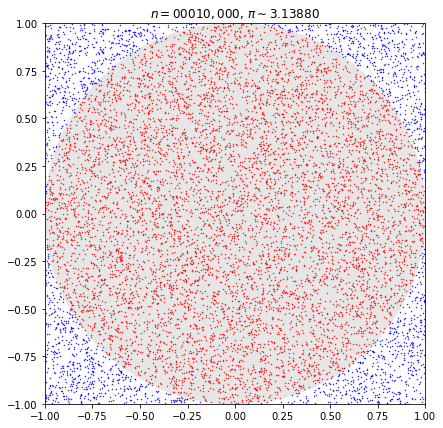

In [4]:
n=10000
π=aproxPi(n)

fig=plt.figure(figsize=(7,7))
ax=fig.add_subplot(111)
ax.set_aspect('equal')

circulo = plt.Circle((0, 0), 1, color='0.9', fill=True, zorder=1)
ax.add_artist(circulo)
ax.scatter(π[1],π[2], s=0.2, c='r', marker="o", zorder=2)
ax.scatter(π[3],π[4], s=0.2, c='b', marker="o", zorder=3)

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.title(f'$n={n:0>9,}$, $\pi \sim {π[0]:0<7.5}$')
plt.show()